In [1]:
import numpy
from scipy.special import j0
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate

PI = numpy.pi
Sin = numpy.sin
Cos = numpy.cos
Sqrt = numpy.sqrt
Power = numpy.power
Argmin = numpy.argmin
Round = numpy.round
Arange = numpy.arange
Atan = numpy.arctan
Atan2 = numpy.arctan2
Grad = numpy.gradient
ABS = numpy.abs
Sign = numpy.sign

# Generating a backbone curve using the modal approach

Consider a planar soft continuum manipulator with a total length of 1 meter defined as:

$$\overline{x}(s) = \begin{bmatrix}
\int_{0}^{s}Lsin\phi(\sigma)d\sigma\\ 
\int_{0}^{s}Lcos\phi(\sigma)d\sigma
\end{bmatrix} \cdots (1)$$

where $L$, the manupulator length is 1 meter. Since this is a planar case, two mode shapes and their participation factors $a_1$, $a_2$ are suffcient to define the backbone curve, with:

$$\phi(s) = a_1sin(2\pi s) + a_2(1-cos(2\pi s))  \dots (2)$$

Substituting equation 2 in 1 and then evaluating at s=1, i.e. at the end effector location ($x_{ee}, y_{ee}$), we get:

$$\left\{\begin{matrix}
x_{ee} = sin(a_2)J_0\sqrt{a_1^2 + a_2^2}\\ 
y_{ee} = cos(a_2)J_0\sqrt{a_1^2 + a_2^2}
\end{matrix}\right. \cdots (3)$$

which can be inverted, given the end effector location ($x_{ee}, y_{ee}$),

$$\begin{vmatrix}
\frac{x_{ee}}{sin(a_2)} =  J_0\sqrt{a_1^2 + a_2^2}
\\\frac{y_{ee}}{cos(a_2)} =  J_0\sqrt{a_1^2 + a_2^2} & x_{ee}^2 + y_{ee}^2 = J_0\sqrt{a_1^2 + a_2^2}(sin(a_2)^2 + cos(a_2)^2)\\ 
 & \\ 
\therefore \frac{x_{ee}}{sin(a_2)} \frac{cos(a_2)}{y_{ee}} = 1 & J_0^{-1}(x_{ee}^2 + y_{ee}^2)^2 = a_1^2 + a_2^2\\ 
 & \\
\mathbf{a_2 = Atan2(x, y)}\cdots(a) & \mathbf{a_1 = \pm \sqrt{J_0^{-1}(x_{ee}^2 + y_{ee}^2)^2 - a_2^2}}\cdots(b)
\end{vmatrix} \cdots (4)$$

where $J_0^{-1}(\cdot)$ is the restricted inverse bessel function of zero order, defined as the inverse of $J_0(z)$ for $0<z<\mu$ where $\mu\approx 3.832$ is first local minimum of $J_0$. Using this, following descretized formula is derived:

$$
J_0^{-1}(z) = 
z\begin{bmatrix}
argmin\left | \frac{x_{ee}}{sin(a_2)} - J_0(z) \right |
\end{bmatrix} \cdots (5)
$$

End effector position at (0.4, 0.5)


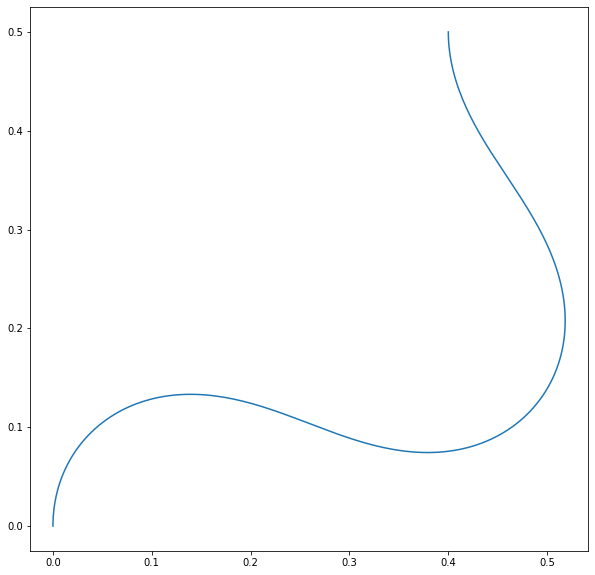

In [361]:
# Intergal of a function using simpson's rule with upper and lower limits a, b
def intergal(f, a, b, N=50):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b - a) / N
    x = numpy.linspace(a, b, N + 1)
    y = f(x)
    S = dx / 3 * numpy.sum(y[0:-1:2] + 4 * y[1::2] + y[2::2])
    return S


# The bessel function formulation
S = 1
L = 1
numPoints = 200

# the input coordinates
# xee, yee = 0.3433, 0.2733
# xee, yee = -0.2933, 0.6133
# xee, yee = 0.35, 0.24
# xee, yee = -0.3, 0.6
xee, yee = 0.4, 0.5
# xee, yee = 0.5, 0.6

a2 = numpy.arctan2(xee, yee)  # equation (4a)

# Calculating the inverse bessel function
z = Arange(0, 3.832, 0.00001)
jz = z[Argmin(abs(xee / Sin(a2) - j0(z)))]  # equation (5)
a1 = Sqrt(jz ** 2 - a2 ** 2)  # equation (4b)

# ϕ(s) = a₁ sin(2πs) + a₂(1 - cos(2πs)) equation (2)
phiS = lambda s: a1 * Sin(2 * PI * s) + a2 * (1 - Cos(2 * PI * s))

#  equation (1)
X1s = lambda b: intergal(lambda s: L * Sin(phiS(s)), 0, b)
X2s = lambda b: intergal(lambda s: L * Cos(phiS(s)), 0, b)

sj = numpy.arange(0, S + (S / numPoints), S / numPoints)

# Coordinates
x1s = numpy.asarray([X1s(s) for s in sj])
x2s = numpy.asarray([X2s(s) for s in sj])

plt.axis("equal")
plt.plot(x1s, x2s)
print("End effector position at ({}, {})".format(Round(x1s[-1], 4), Round(x2s[-1], 4)))

# Backbone curve as a two dimensional optical waveguide

For convenience, lets first convert the cartsian form of the backbone curve to general polar form.

$$\left\{\begin{matrix}
r = \sqrt{\bar{x}_1^2(s) + \bar{x}_2^2(s)}\\ 
\theta = arctan(\bar{x}_2(s), \bar{x}_1(s))
\end{matrix}\right.\cdots (1)$$
with $x = r cos(\theta), y = r sin(\theta)$

Now we choose to use a super-ellipse curves as the shape of boundaries and axis of the waveguide as shown below:

 <img src="./waveguide-profile.png" width="250" height="250" alt="base64 test">

The super-ellipse curve can be described by the parametric equations:
$$\left\{\begin{matrix}
x = r_s(cos\theta_s)^{2/n_s}\\ 
y = r_s(sin\theta_s)^{2/n_s}
\end{matrix}\right.\cdots (2)$$

where $r_s$ and $\theta_s$ are coordiantes othe super-ellipse polar coordinate system. The values of $r_s$ and $n_s$ for the inner boundarym the axis and the outrboundary of the waveguide bends are listed in table 1:

|                	| $r_s(\mu m)$ 	| $n_s$     	|
|----------------	|--------------	|-----------	|
| Inner boundary 	| $r_1$=1.5    	| $n_1$=4.0 	|
| Waveguide axis 	| $r_2$=2.0    	| $n_2$=3.5 	|
| Outer boundary 	| $r_3$=2.5    	| $n_3$=3.0 	|
|**Table 1** *Parameters for super-ellipse curves*  |

## Relationship between $(r, \theta)$ and $(r_s, \theta_s)$
Note that polar coordiantes from $(r, \theta)$ both come from the $(x_1(s), x_2(s))$ coordinates of the backbone curve. To convert then to polar coodinates of the super-ellipse coordinate system, we need to calculate ($r_s$, $\theta_s$).

From equation (2)
$$\begin{vmatrix}
\frac{y}{x} =  (\frac{sin\theta_s}{cos\theta_s})^\frac{2}{n_s} & x^{n_s} + y^{n_s} = r_s^{n_s}(cos^2\theta_s + sin^2\theta_s)
\\ & \\ 
\mathbf{\theta_s = Atan2(y^{\frac{2}{n_s}}, x^{\frac{2}{n_s}})} \cdots (a) & \mathbf{r_s = \sqrt[n_s]{x^{n_s} + y^{n_s}}} \cdots (b)\\ 
\end{vmatrix} \cdots (3)$$

It is worthwhile to point out that variable $n_s$ in equation (2) is linear along the super-ellipse polar coordinate $r_s$

$$n_s = n_1 - (n_1 - n_3)\frac{r_s - r_3}{r_1 - r_3} \cdots (4)$$

Therefore, we can substitute $r_s = r, x=x_1(s), y=x_2(s)$, then calculate $n_s$ and subsequently $(r_s, \theta_s)$.

## Offset curves to the super-ellipse
To calculate the geometry of the optical waveguide, we also need to define the outer boundary and inboundary super-ellipse curves. An offset curve is a set of points that lie a distance $d$ perpendicular from a progenitor curve. Since we have a parameterised form of the super-ellipse curve $\textbf{C}$, the offset curve $\textbf{C}_d$ is given by

$$\left\{\begin{matrix}
\textbf{C}_d = \textbf{C} + d \cdot n\\ 
n = \frac{(\dot{y}, -\dot{x})}{\sqrt{\dot{x}^2 + \dot{y}^2}}
\end{matrix}\right. \cdots (5)$$

where $n$ is the unit normal of the curve $\textbf{C}$

Also, it worth mentioning the curvature $k$

$$k = \frac{|x'y'' - y'x''|}{(x'^2 + y'^2)^{\frac{3}{2}}} \cdots (6)$$

Refer to : **Au, Chikit & Ma, Yongsheng. (2013)**. *Computation of Offset Curves Using a Distance Function: Addressing a Key Challenge in Cutting Tool Path Generation. 10.1007/978-1-4471-5073-2_8.*

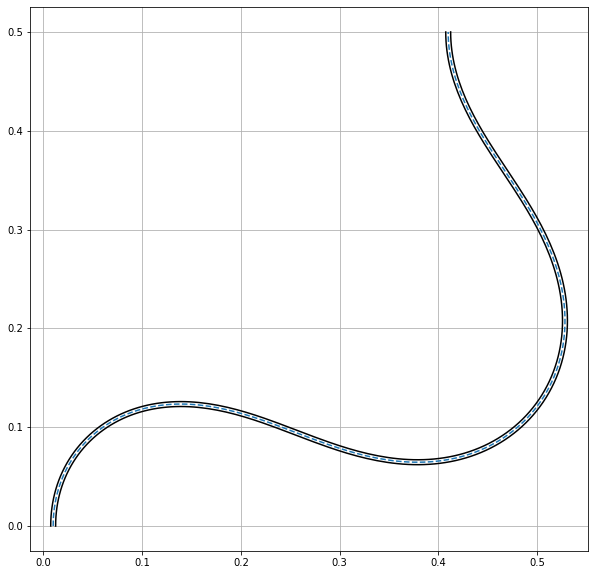

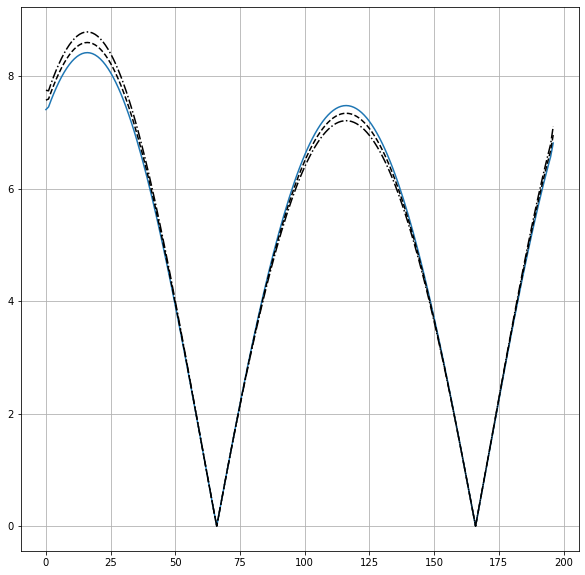

In [362]:
# Cartesian to polar form
R = lambda x, y: Sqrt(x ** 2 + y ** 2)
r = R(x1s, x2s)

# General polar form to super-ellipse coodinate system
r1, r2, r3, n1, n2, n3 = 1.5, 2.0, 2.5, 4.0, 3.5, 3.0
NS = lambda r: n1 - (n1 - n3) * (r - r3) / (r1 - r3)  # Equation (4)
ΘS = lambda x, y, ns: Atan2(y ** (ns / 2), x ** (ns / 2))  # Equation (3a)
RS = lambda x, y, ns: (x ** ns + y ** ns) ** (ns ** -1)  # Equation (3b)
X = lambda rs, Θs, ns: rs * (Cos(Θs) ** (2 / ns))
Y = lambda rs, Θs, ns: rs * (Sin(Θs) ** (2 / ns))

# Solve Equation (4), (3a) and (3b)
ns = NS(r)
rs, Θs = RS(x1s, x2s, ns), ΘS(x1s, x2s, ns)
x, y = X(rs, Θs, ns), Y(rs, Θs, ns)

# Offset curves
ds = lambda a: Grad(a)
n = lambda a, b: ds(a) / Sqrt(ds(a) ** 2 + ds(b) ** 2)
f = lambda x: x / len(x)
Xd = lambda x, y, d: x - d * f(n(y, x))  # Equation (5)
Yd = lambda x, y, d: y + d * f(n(x, y))  # Equation (5)

# Solve Equation (5)
x1sd, y1sd = Xd(x, y, -r1), Yd(x, y, -r1)
x2sd, y2sd = Xd(x, y, -r2), Yd(x, y, -r2)
x3sd, y3sd = Xd(x, y, -r3), Yd(x, y, -r3)

# Curvature Equation (6)
K = (
    lambda x, y: ABS(ds(x) * ds(ds(y)) - ds(y) * ds(ds(x)))
    / (ds(x) ** 2 + ds(y) ** 2) ** 1.5
)
# Solve Equation (6)
k1 = K(x1sd, y1sd)
k2 = K(x2sd, y2sd)
k3 = K(x3sd, y3sd)

plt.rcParams["figure.figsize"] = (10, 10)
plt.axis("equal")
plt.plot(x1sd, y1sd, color="black")
plt.plot(x2sd, y2sd, "--")
plt.plot(x3sd, y3sd, color="black")
plt.grid()
plt.show()

plt.plot(k1[2:-2])
plt.plot(k2[2:-2], "--", color="black")
plt.plot(k3[2:-2], "-.", color="black")
plt.grid()
plt.show()

The curvature of the inner boundary, axis, and outer boundary of the waveguide bend are shown in the figure, indicated by solid, dashed and dotted-dashed lines, respectively. Due to the sharp bend at the initial part of the curve, curvature starts from a global maximum, then declines to zero as the curve waveguide flattens. Notice that the outer boundary is the most bent in this region, followed by inner boundary (which can be thought of as a negative bend). Thus, the light that propagates will bend most around the inner boundary. The curvature is mostly linear before and after the second bend where in the middle, the light mostly travels around the axis curve. For further details, refer to:

**Cao, Yinghui & Mittra, Raj & Liu, Zhenyu & Zheng, Jie. (2017)**. *Sharp bend in two-dimensional optical waveguide based on gradient refractive index structure. Applied Optics. 56. 5336. 10.1364/AO.56.005336.*

Based on this curvature analysis, the refractive index profile of the waveguide can be defined as:

$$n(\theta_s, r_s) = n_{min} + (n_{max} - n_{min}) R(r_s) \Theta (\theta_s) \cdots(1)$$

where $(n_{min}, n_{max})=(1.5,3.375)$. $R(r_s)$ describes refractive index profile along the super-ellipse polar coordinates $r_s$, which is defined as:
$$R(r_s)=\frac{r_3 - r_s}{r_3-r_1}\cdots(2)$$

and $\Theta(\theta_s)$ describes the refractive index profile along the super-ellipse polar coordinates $\theta_s$, which is defined as:

$$\Theta(\theta_s) = \left\{\begin{matrix}
\theta_s/\theta_a & if\text{ }0\leq \theta_s \leq \theta_a,\\ 
1 & if\text{ }\theta_a\leq \theta_s \leq \frac{\pi}{2}-\theta_a,\\
(\frac{\pi}{2} - \theta_s)/\theta_a & if\text{ }\frac{\pi}{2}-\theta_a\leq \theta_s\leq\frac{\pi}{2}
\end{matrix}\right.\cdots (3)$$

The parameter $\theta_a$ in equation (3) is set to 23.4°

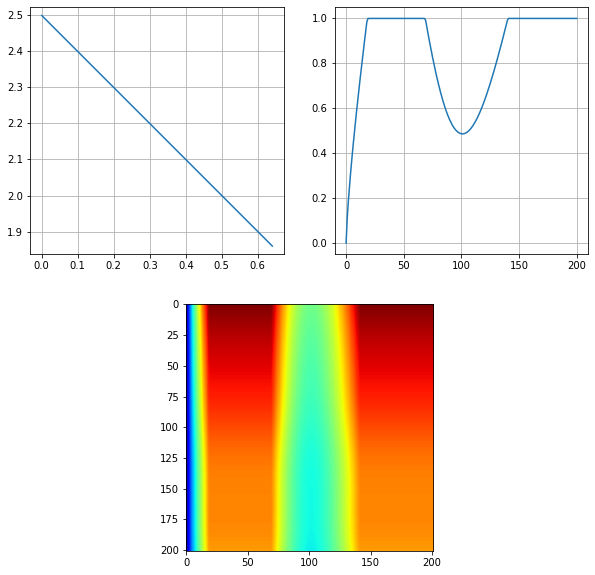

In [363]:
θa = 23.4 * PI / 180

R = lambda rS: (r3 - rS) / (r3 - r1)  # Equation (2)
BigΘ = (
    lambda θa, θs: θs / θa
    if (θs >= 0 and θs <= θa)
    else (
        1
        if θs >= θa and θs <= PI / 2 - θa
        else (
            (PI / 2 - θs) / θa
            if (θs >= PI / 2 - θa and θs <= PI / 2)
            else 0
        )
    )
)  # Equation (3)

# Solve equation (2) and (3)
RrS = R(r)
Θθs = numpy.array([BigΘ(θa, s) for s in Θs])

# Equation (1)
nMin, nMax = 1.5, 3.375
n = lambda RrS, Θθs: nMin + (nMax - nMin) * RrS * Θθs

# Solve equation (1)
nθsrS = numpy.ones((len(RrS), len(Θθs)))
ij = [(i, j) for i in range(len(RrS)) for j in range(0, len(Θθs))]
for i, j in ij:
    nθsrS[i, j] = n(RrS[i], Θθs[j])

plt.rcParams["figure.figsize"] = (10, 10)
plt.tight_layout(); plt.subplot(2, 2, 1)
plt.grid(); plt.axis("equal"); plt.plot(r, RrS)
plt.subplot(2, 2, 2); plt.grid();
plt.plot(Θθs); plt.subplot(2, 2, (3, 4));
plt.imshow(nθsrS, cmap="jet"); plt.show()

/home/asheesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':
/home/asheesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


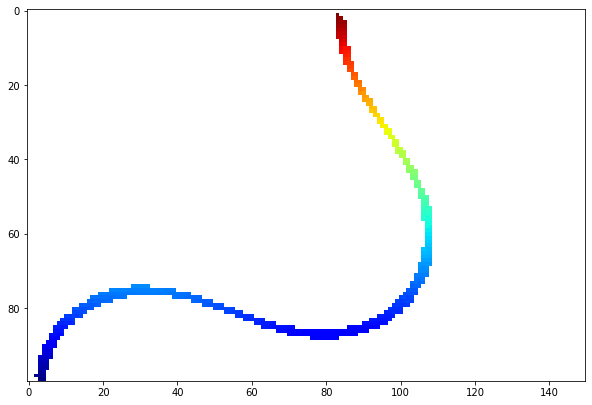

In [367]:
# Function to map (x, y) coordinates to indeces.
mapr = (
    lambda a1, a2, b1, b2, s: 0
    if s != s
    else Round(b1 + ((s - a1) * (b2 - b1) / (a2 - a1))).astype(int)
)

# Refractive index field in cartesian coordinates
nxy = numpy.zeros((len(r), len(r)))
for RR in Arange(r1, r3, 0.001):
    # First we calculate a parallel curve
    XX, YY = Xd(x, y, -RR), Yd(x, y, -RR)
    # Next we find out their corresponding refractive index
    # profiles in the rs nad Θs super-ellipse polar coordinates
    rrs, ΘΘs = RS(XX, YY, ns), ΘS(XX, YY, ns)
    nns = NS(rrs)
    for i in range(0, len(rrs)):
        # map (x, y) coordinates to indeces
        a = mapr(0, 1, 0, len(rrs), X(rrs[i], ΘΘs[i], nns[i]))
        b = mapr(0, 1, 0, len(rrs), Y(rrs[i], ΘΘs[i], nns[i]))
        # Populate the field
        nxy[a, b] = n(rrs[i], ΘΘs[i])

nxy[nxy == 0.] = numpy.NaN
plt.imshow(numpy.fliplr(nxy[:150, :100]).T, cmap="jet")
plt.show()